In [1]:
import sys
sys.path.append('../')
from read_data_functions import *
from plot_functions import *
from calculations import *
plt.style.use('../Style.mplstyle')
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # suppress warnings

In [2]:
path = '../../../Data/Old data/'
AMS_paths = ['220505_ramp_carene_258K/', '220518_ramp_apinene_258K/', '220608_ramp_apinene_293K/']

AMS = {}
for AMS_path in AMS_paths:
    df = import_txt(f'{path}{AMS_path}AMS/', '', 't_series', '%d-%m-%Y %H:%M:%S', 0)
    name = AMS_path.split('_')[0]
    for key in df.keys():
        if 'PToF' not in key:
            AMS[key] = df[key]

print(AMS['220505_AMS'].keys())
print(AMS['220505_AMS_old'].keys())
print(AMS.keys())

Index(['t_series', 'HROrg_M_all', 'HRNO3_M_all', 'HRSO4_M_all', 'HRNH4_M_all',
       'HRChl_M_all', 'Ratio_H_C_all_IA', 'Ratio_O_C_all_IA',
       'familyCHN_M_all', 'familyCHO1_M_all', 'familyCHO1N_M_all',
       'familyCH_M_all', 'f43', 'f44', 'Time'],
      dtype='object')
Index(['t_series', 'HROrg_D_all', 'HRNO3_D_all', 'HRSO4_D_all', 'HRNH4_D_all',
       'HRChl_D_all', 'f44', 'f43', 'Ratio_H_C_all_IA', 'Ratio_O_C_all_IA',
       'Time'],
      dtype='object')
dict_keys(['220505_AMS', '220505_AMS_old', '220518_AMS', '220518_AMS_old', '220608_AMS', '220608_AMS_old'])


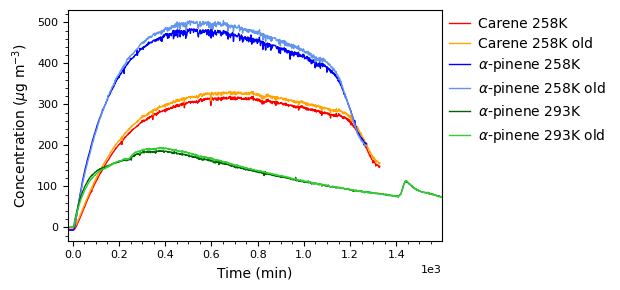

In [3]:
start_times = ['2022-05-05 14:48', '2022-05-05 14:48', 
               '2022-05-18 14:34', '2022-05-18 14:34', 
               '2022-06-08 10:20', '2022-06-08 10:20']
dict_keys = ['220505_AMS', '220505_AMS_old', '220518_AMS', '220518_AMS_old', '220608_AMS', '220608_AMS_old']

colors = ['r', 'orange', 'b', 'cornflowerblue', 'darkgreen', 'limegreen']
fig1, ax1 = plt.subplots(figsize = (6.3, 3))

for i, t_zero in enumerate(start_times):
    if 'old' in dict_keys[i]:
        plot_total(ax1, AMS[dict_keys[i]], 'HROrg_D_all', colors[i], False, t_zero)
    else:
        plot_total(ax1, AMS[dict_keys[i]], 'HROrg_M_all', colors[i], False, t_zero)

ax1.set(ylabel = 'Concentration ($\mu$g m$^{-3}$)')
ax1.legend(labels = ['Carene 258K', 'Carene 258K old', r'$\alpha$-pinene 258K', 
                     r'$\alpha$-pinene 258K old', r'$\alpha$-pinene 293K', r'$\alpha$-pinene 293K old']
           , bbox_to_anchor = (1, 1))
fig1.tight_layout()
fig1.savefig('Timeseries.jpg', dpi = 600)